In [1]:
! pip install -q "autogen-agentchat==0.2.39" "groq==0.13.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.2/382.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.2 MB/s eta 0:00:00


In [2]:
import os
import autogen
from autogen import AssistantAgent, UserProxyAgent
from google.colab import userdata

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
api_key = userdata.get('GROQ_API_KEY')
model = "llama3-70b-8192"

In [4]:
llm_config = {
    "model": model,
    "api_key": api_key,
    "api_type": "groq",
    }

In [6]:
assistant = AssistantAgent("assistant", llm_config=llm_config)

user_proxy = UserProxyAgent(
    "user_proxy", code_execution_config={"executor": autogen.coding.LocalCommandLineCodeExecutor(work_dir="coding")}
)

# Start the chat
user_proxy.initiate_chat(
    assistant,
    message="Plot a chart of NVDA and TESLA stock price change YTD.",
)

user_proxy (to assistant):

Plot a chart of NVDA and TESLA stock price change YTD.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of NVDA and TESLA stock price change YTD, I'll use the `yfinance` and `matplotlib` libraries in Python. Here's the code:
```
# filename: stock_chart.py
import yfinance as yf
import matplotlib.pyplot as plt

# Get YTD data for NVDA and TESLA
nvda_data = yf.download('NVDA', start='2023-01-01', end='2023-12-31')['Adj Close']
tesla_data = yf.download('TSLA', start='2023-01-01', end='2023-12-31')['Adj Close']

# Calculate daily returns
nvda_returns = nvda_data.pct_change()
tesla_returns = tesla_data.pct_change()

# Plot the chart
plt.figure(figsize=(12,6))
plt.plot(nvda_returns, label='NVDA')
plt.plot(tesla_returns, label='TSLA')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('NVDA and TSLA Stock Price Change YTD')
plt.legend()
plt.show()
```
Please execute this code to generate the

ChatResult(chat_id=None, chat_history=[{'content': 'Plot a chart of NVDA and TESLA stock price change YTD.', 'role': 'assistant', 'name': 'user_proxy'}, {'content': "To plot a chart of NVDA and TESLA stock price change YTD, I'll use the `yfinance` and `matplotlib` libraries in Python. Here's the code:\n```\n# filename: stock_chart.py\nimport yfinance as yf\nimport matplotlib.pyplot as plt\n\n# Get YTD data for NVDA and TESLA\nnvda_data = yf.download('NVDA', start='2023-01-01', end='2023-12-31')['Adj Close']\ntesla_data = yf.download('TSLA', start='2023-01-01', end='2023-12-31')['Adj Close']\n\n# Calculate daily returns\nnvda_returns = nvda_data.pct_change()\ntesla_returns = tesla_data.pct_change()\n\n# Plot the chart\nplt.figure(figsize=(12,6))\nplt.plot(nvda_returns, label='NVDA')\nplt.plot(tesla_returns, label='TSLA')\nplt.xlabel('Date')\nplt.ylabel('Return')\nplt.title('NVDA and TSLA Stock Price Change YTD')\nplt.legend()\nplt.show()\n```\nPlease execute this code to generate the ch

###### I'm a text-based AI, I don't have the capability to directly display images.

`stock_chart.png` and `price_change_vs_month.png` are saved in the current working directory. You can then open this file to view the chart.


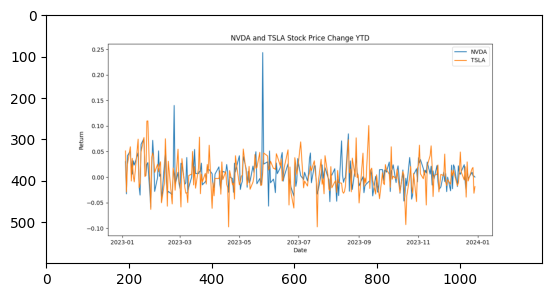

In [10]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img = plt.imread('/content/coding/stock_chart.png')
imshow(img)
plt.show()

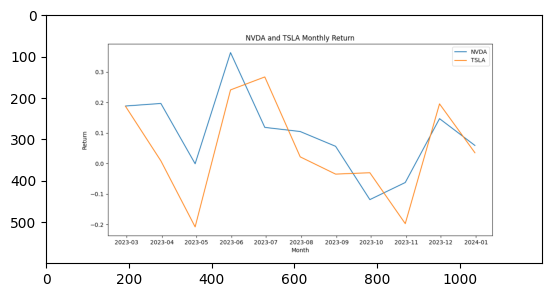

In [11]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img = plt.imread('/content/coding/price_change_vs_month.png')
imshow(img)
plt.show()